In [1]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
#nltk.download()

In [2]:
with open("Tesla_Comments_p.json", "r") as file:
    tesla_data_p = json.load(file)
    
with open("Tesla_Comments_c.json", "r") as file:
    tesla_data_c = json.load(file)
    
    
    
with open("GE_Comments_p.json", "r") as file:
    ge_data_p = json.load(file)
    
with open("GE_Comments_c.json", "r") as file:
    ge_data_c = json.load(file)
    
    
    
    
with open("AMD_Comments_p.json", "r") as file:
    amd_data_p = json.load(file)
with open("AMD_Comments_c.json", "r") as file:
    amd_data_c = json.load(file)
    
with open("NVDA_Comments_p.json", "r") as file:
    nvda_data_p = json.load(file)
with open("NVDA_Comments_c.json", "r") as file:
    nvda_data_c = json.load(file)

    
tesla_stock_data = pd.read_csv("TSLA.csv")
ge_stock_data = pd.read_csv("GE.csv")
amd_stock_data = pd.read_csv("AMD.csv")
nvda_stock_data = pd.read_csv("NVDA.csv")

posts = [tesla_data_p, ge_data_p, amd_data_p, nvda_data_p]
comms = [tesla_data_c, ge_data_c, amd_data_c, nvda_data_c]
stocs = [tesla_stock_data, ge_stock_data, amd_stock_data, nvda_stock_data]
tickers = ["TSLA","GE","AMD","NVDA"]

In [3]:
# Combining and Cleaning Finance and Social Media data

combined = pd.DataFrame()
for comm, post, stoc, ticker in zip(comms, posts, stocs, tickers):
    
    # create columns
    df_comments = pd.json_normalize(comm).transpose()
    df_posts = pd.json_normalize(post).transpose()
    #df_posts.rename(columns={0,"Posts"})
    df_posts.columns = ['Posts']
    
    df_stock_info = stoc.set_index("Date")
    
    # join columns
    joined_df = df_stock_info.join(df_comments)
    joined_df = joined_df.join(df_posts)

    # add price column chance
    joined_df["Price_Change"] = joined_df["Close"] - joined_df["Open"]

    def dire(x):
        if x>0:
            return "up"
        elif x<0:
            return "down"
        else:
            return "no change"

    joined_df["Direction"] = joined_df["Price_Change"].apply(dire) 

    joined_df["Ticker"] = ticker


    joined_df2 = joined_df.rename(columns={"Open":"Open_Price","High":"High_Price","Low":"Low_Price","Close":"Close_Price",
                              "Volume":"Trade_Volume","Direction":"Price_Direction",0:"Comments"})
    
    joined_df3 = joined_df2
    
    combined = pd.concat([combined,joined_df3])
    
# drop rows where posts are empty so comments are nan

combined = combined.dropna()

In [4]:
combined

,Open_Price,High_Price,Low_Price,Close_Price,Adj Close,Trade_Volume,Comments,Posts,Price_Change,Price_Direction,Ticker
Date,,,,,,,,,,,
2020-10-01,440.760010,448.880005,434.420013,448.160004,448.160004,50741500,[[https://www.reddit.com/r/teslainvestorsclub/...,[],7.399994,up,TSLA
2020-10-02,421.390015,439.130005,415.000000,415.089996,415.089996,71430000,"[Pre market indicators are brutal, -18.5%:\n\n...",[I get these numbers by adding together the ma...,-6.300019,down,TSLA
2020-10-05,423.350006,433.640015,419.329987,425.679993,425.679993,44722800,"[must be your first tsla contract, Keep buying...",[[removed]],2.329987,up,TSLA
2020-10-06,423.790009,428.779999,406.049988,413.980011,413.980011,49146300,[Going to have to wait a while to find out but...,[],-9.809998,down,TSLA
2020-10-07,419.869995,429.899994,413.850006,425.299988,425.299988,43127700,"[Keep buying tsla., Gonna need to add tsla if ...",[],5.429993,up,TSLA
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,530.239990,531.000000,520.200012,520.369995,520.190430,4478600,[Important to point out that the new generatio...,[So I cant make up my mind on what to go for. ...,-9.869995,down,NVDA
2020-12-28,522.500000,522.500000,510.529999,516.000000,515.821960,5314100,[That’s not what I’m asking: I’m saying what d...,[Xilinx price target raised to $150 from $112 ...,-6.500000,down,NVDA
2020-12-29,517.000000,522.900024,513.690002,517.729980,517.551331,4259300,"[Happy to say i owned TSLA, ETSY, and NVDA dur...","[ Dear fellow autists,\n\nTo celebrate the en...",0.729980,up,NVDA


In [9]:
# Sentiment Creation

Post_Sentiment = []
Comment_Sentiment = []

sia = SentimentIntensityAnalyzer()

Total_Positive_Sentiment_Comm = []
Total_Negative_Sentiment_Comm = []
Total_Positive_Sentiment_Post = []
Total_Negative_Sentiment_Post = []
Number_of_Comments = []

for p, c in zip(combined["Posts"], combined["Comments"]):
    
    # Comment Sentiment
    tot_pos = 0
    tot_neg = 0

    for comment in c:
        pos = sia.polarity_scores(comment)["pos"]
        tot_pos = tot_pos + pos
        
        neg = sia.polarity_scores(comment)["neg"]
        tot_neg = tot_neg + neg
        
    if tot_pos > tot_neg:
        Comment_Sentiment.append("Pos")
    else:
        Comment_Sentiment.append("Neg")
        
    Total_Positive_Sentiment_Comm.append(tot_pos)
    Total_Negative_Sentiment_Comm.append(tot_neg)
       
        
    # Post Sentiment
    tot_pos = 0
    tot_neg = 0

    for post in p:
        pos = sia.polarity_scores(post)["pos"]
        tot_pos = tot_pos + pos
        
        neg = sia.polarity_scores(post)["neg"]
        tot_neg = tot_neg + neg

    if tot_pos > tot_neg:
        Post_Sentiment.append("Pos")
    else:
        Post_Sentiment.append("Neg")
    
    Total_Positive_Sentiment_Post.append(tot_pos)
    Total_Negative_Sentiment_Post.append(tot_neg) 
    
    Number_of_Comments.append(len(c))
    
    
combined["Post_Sentiment"] = Post_Sentiment
combined["Comment_Sentiment"] = Comment_Sentiment
combined["Total_Positive_Sentiment_Comm"] = Total_Positive_Sentiment_Comm
combined["Total_Negative_Sentiment_Comm"] = Total_Negative_Sentiment_Comm
combined["Total_Positive_Sentiment_Post"] = Total_Positive_Sentiment_Post
combined["Total_Negative_Sentiment_Post"] =Total_Negative_Sentiment_Post
combined["Number_of_Comments"] = Number_of_Comments

In [10]:
combined2 = combined[["Ticker","Posts","Post_Sentiment","Total_Positive_Sentiment_Post",
                      "Total_Negative_Sentiment_Post", "Comments", "Comment_Sentiment",
                      "Total_Positive_Sentiment_Comm", 
                      "Total_Negative_Sentiment_Comm","Number_of_Comments","Price_Change",
                      "Price_Direction","Open_Price","Close_Price","High_Price",
                      "Low_Price","Trade_Volume"]]



In [11]:
combined2

,Ticker,Posts,Post_Sentiment,Total_Positive_Sentiment_Post,Total_Negative_Sentiment_Post,Comments,Comment_Sentiment,Total_Positive_Sentiment_Comm,Total_Negative_Sentiment_Comm,Number_of_Comments,Price_Change,Price_Direction,Open_Price,Close_Price,High_Price,Low_Price,Trade_Volume
Date,,,,,,,,,,,,,,,,,
2020-10-01,TSLA,[],Neg,0.000,0.000,[[https://www.reddit.com/r/teslainvestorsclub/...,Neg,0.000,0.000,2,7.399994,up,440.760010,448.160004,448.880005,434.420013,50741500
2020-10-02,TSLA,[I get these numbers by adding together the ma...,Pos,0.087,0.044,"[Pre market indicators are brutal, -18.5%:\n\n...",Neg,0.060,0.478,3,-6.300019,down,421.390015,415.089996,439.130005,415.000000,71430000
2020-10-05,TSLA,[[removed]],Neg,0.000,0.000,"[must be your first tsla contract, Keep buying...",Pos,0.418,0.098,6,2.329987,up,423.350006,425.679993,433.640015,419.329987,44722800
2020-10-06,TSLA,[],Neg,0.000,0.000,[Going to have to wait a while to find out but...,Neg,0.135,0.222,2,-9.809998,down,423.790009,413.980011,428.779999,406.049988,49146300
2020-10-07,TSLA,[],Neg,0.000,0.000,"[Keep buying tsla., Gonna need to add tsla if ...",Pos,0.497,0.000,5,5.429993,up,419.869995,425.299988,429.899994,413.850006,43127700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,NVDA,[So I cant make up my mind on what to go for. ...,Pos,0.105,0.032,[Important to point out that the new generatio...,Pos,0.072,0.000,1,-9.869995,down,530.239990,520.369995,531.000000,520.200012,4478600
2020-12-28,NVDA,[Xilinx price target raised to $150 from $112 ...,Pos,0.055,0.000,[That’s not what I’m asking: I’m saying what d...,Pos,0.454,0.237,4,-6.500000,down,522.500000,516.000000,522.500000,510.529999,5314100
2020-12-29,NVDA,"[ Dear fellow autists,\n\nTo celebrate the en...",Neg,0.092,0.096,"[Happy to say i owned TSLA, ETSY, and NVDA dur...",Pos,1.810,0.324,16,0.729980,up,517.000000,517.729980,522.900024,513.690002,4259300


In [12]:
num_vs = set(combined2.columns) 
num_vs = num_vs - set(["Date","Ticker","Posts","Post_Sentiment","Comments","Comment_Sentiment","Price_Direction"])

In [13]:
stat_df = pd.DataFrame()

In [14]:
def stats(val, name):
    l = []
    l.append(combined2[v].mean())
    l.append(combined2[v].std())
    l.append(combined2[v].min())
    l.append(np.percentile(combined2[v],25))
    l.append(np.percentile(combined2[v],50))
    l.append(np.percentile(combined2[v],75))
    l.append(int(combined2[v].max()))
    new_l = []
    for item in l:
        new_l.append(round(item,2))
    #print(new_l)
    return new_l
    

for v in num_vs:
    df = pd.DataFrame(combined2[v]).apply(stats, axis=0, name = v)
    stat_df = pd.concat([stat_df, df], axis=1)

In [15]:
stat_df.index = ['Mean','Std',"Min","25_perc","50_perc","75_perc","Max"]
stat_df

,Price_Change,Trade_Volume,Total_Positive_Sentiment_Comm,Number_of_Comments,Close_Price,Open_Price,Total_Positive_Sentiment_Post,High_Price,Total_Negative_Sentiment_Comm,Total_Negative_Sentiment_Post,Low_Price
Mean,-0.34,5.401372e+07,2.06,19.69,245.62,245.96,0.07,250.57,1.01,0.03,240.27
Std,11.29,3.894074e+07,1.70,16.01,275.86,276.08,0.07,281.64,0.91,0.06,269.25
Min,-49.21,4.181900e+06,0.00,1.00,6.17,6.22,0.00,6.40,0.00,0.00,6.11
25_perc,-1.43,3.227860e+07,0.59,5.00,13.18,13.16,0.00,13.31,0.28,0.00,13.04
50_perc,-0.06,4.627070e+07,1.88,18.00,85.37,85.76,0.05,87.09,0.83,0.01,83.97
75_perc,0.83,6.657970e+07,3.06,29.00,523.51,526.90,0.11,535.18,1.49,0.05,518.70
Max,65.00,3.058053e+08,8.00,112.00,880.00,877.00,0.00,900.00,6.00,0.00,858.00


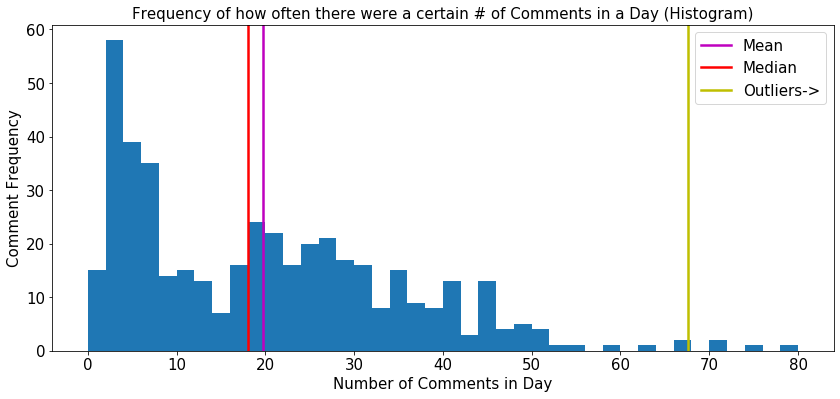

In [26]:
# Comment Frequency EDA Visualization

num_comms_day = []
for comm in combined2["Comments"]:
    num_comms_day.append(len(comm))

mean2 = np.mean(num_comms_day)
median2 = np.median(num_comms_day)
sta_d = np.std(num_comms_day)
outliers = (mean2 + (3 * sta_d))
   
    
# GRAPH
hist_fig = plt.figure(figsize = (14, 6))
    
plt.hist(num_comms_day, bins = 40, range = [0,80])

plt.title("Frequency of how often there were a certain # of Comments in a Day (Histogram)", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.ylabel("Comment Frequency", fontsize = 15)
plt.xlabel("Number of Comments in Day", fontsize = 15)

plt.axvline(mean2, color = 'm', linewidth = 2.5, label = "Mean")
plt.axvline(median2, color = 'r', linewidth = 2.5, label = "Median")
plt.axvline(outliers, color = 'y', linewidth = 2.5, label = "Outliers->")
plt.legend(fontsize = 15)


Text(0.5, 0, 'Number of Comments in Day')

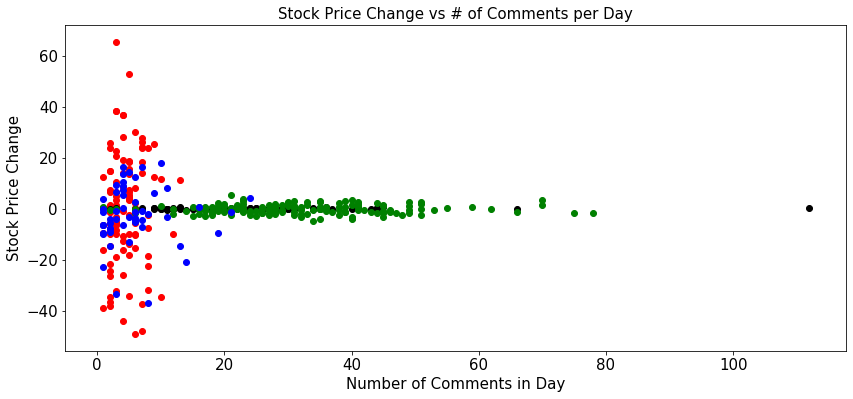

In [27]:
# Stock Price Change vs Comments Per Day EDA Visualization

ticker = list(combined2["Ticker"].values)

colors = []
for t in ticker:
    if t == "TSLA":
        colors.append("red")
    elif t == "AMD":
        colors.append("green")
    elif t == "NVDA":
        colors.append("blue")
    elif t == "GE":
        colors.append("black")

num_comms_day
p_change = list(combined2["Price_Change"].values)

# GRAPH
scat_fig = plt.figure(figsize = (14, 6))
     
    
for i in range(len(ticker)):
    plt.scatter(num_comms_day[i], p_change[i], c=colors[i])

plt.title("Stock Price Change vs # of Comments per Day", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.ylabel("Stock Price Change", fontsize = 15)
plt.xlabel("Number of Comments in Day", fontsize = 15)

In [9]:
## ABOVE interesting, Company with fewer number of comments in day have more price volatility.

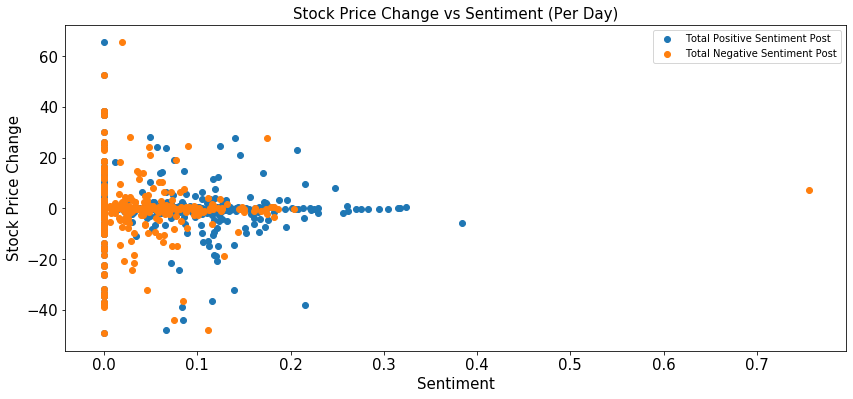

In [28]:
# Stock Price Change vs Sentiment EDA Visualization

p_change = list(combined2["Price_Change"].values)
p_sent = list(combined2["Total_Positive_Sentiment_Post"].values)
n_sent = list(combined2["Total_Negative_Sentiment_Post"].values)


# GRAPH
scat_fig = plt.figure(figsize = (14, 6))

plt.scatter(p_sent, p_change, label = "Total Positive Sentiment Post")
plt.scatter(n_sent, p_change, label = "Total Negative Sentiment Post")

plt.title("Stock Price Change vs Sentiment (Per Day)", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.ylabel("Stock Price Change", fontsize = 15)
plt.xlabel("Sentiment", fontsize = 15)

plt.legend()

In [ ]:
# When Strong Sentiment is low, volatility is high

In [ ]:

# More Analysis...


###  When sentiment/feelings and number of comments are low, Price Volatility is High

### When lot of sentiment/strong feelings and comments are high, Price Volatility is Low

# This is surprising, you would have thought this was the other way around. 
# The need for more data may be required, as the visualization shows each company...
    #...is clustered in a particular spot on the graph.

In [ ]:
### HOWEVER... it appears, even amongst each individual company, the scatter...
    ###... plots appear to show an even distribution along the y axis.  This doesn't 
    ###... point to strong hope of spotting any strong correlations.

In [153]:
# Load Word Count Data


with open("all_up_words.json", "r") as file:
    up_words = json.load(file)
    
with open("all_down_words.json", "r") as file:
    down_words = json.load(file)


In [154]:
for ups, downs in zip(up_words, down_words):
    print(ups, downs)

['cpu', 180] ['even', 247]
['even', 172] ['think', 221]
['see', 168] ['much', 216]
['good', 168] ['new', 215]
['think', 166] ['need', 202]
['much', 166] ['go', 200]
['still', 158] ['could', 198]
['need', 150] ['buy', 195]
['want', 149] ['good', 194]
['new', 149] ['cpu', 193]
['use', 146] ['want', 185]
['buy', 144] ['people', 176]
['know', 143] ['use', 176]
['people', 143] ['since', 174]
['time', 137] ['time', 165]
['could', 129] ['still', 161]
['go', 127] ['see', 154]
['way', 123] ['might', 152]
['price', 117] ['price', 149]
['since', 116] ['know', 146]
['stock', 114] ['got', 146]
['performance', 109] ['way', 140]
['take', 108] ['may', 138]
['well', 103] ['support', 128]
['lot', 103] ['sure', 122]
['got', 98] ['stock', 119]
['best', 98] ['work', 118]
['right', 96] ['best', 117]
['post', 94] ['first', 117]
['two', 93] ['well', 116]
['pretty', 92] ['performance', 116]
['please', 91] ['take', 114]
['look', 91] ['able', 111]
['support', 89] ['lot', 110]
['may', 89] ['something', 109]
['sur

['lineup', 6] ['particular', 8]
['v', 6] ['response', 8]
['pure', 6] ['intense', 8]
['guide', 6] ['external', 8]
['catch', 6] ['zero', 8]
['dark', 6] ['appropriate', 8]
['avoid', 6] ['comparison', 8]
['aware', 6] ['v', 8]
['airflow', 6] ['broken', 8]
['host', 6] ['prime', 8]
['silicon', 6] ['rig', 8]
['alder', 6] ['segment', 8]
['infinity', 6] ['hyper', 8]
['vengeance', 6] ['awe', 8]
['lo', 6] ['discrete', 8]
['shortage', 6] ['fund', 7]
['consumption', 6] ['fed', 7]
['package', 6] ['tomorrow', 7]
['loaves', 6] ['shut', 7]
['ride', 5] ['middle', 7]
['alert', 5] ['dollar', 7]
['aircraft', 5] ['final', 7]
['sword', 5] ['pandemic', 7]
['j', 5] ['income', 7]
['bear', 5] ['result', 7]
['vision', 5] ['dump', 7]
['edit', 5] ['hour', 7]
['strong', 5] ['wonder', 7]
['success', 5] ['accurate', 7]
['car', 5] ['entry', 7]
['obvious', 5] ['dip', 7]
['hour', 5] ['funny', 7]
['train', 5] ['history', 7]
['commercial', 5] ['honest', 7]
['press', 5] ['diamond', 7]
['extreme', 5] ['summer', 7]
['dash', 5]

['extensive', 3] ['loud', 4]
['deserve', 3] ['audio', 4]
['uplift', 3] ['legend', 4]
['substrate', 3] ['keynote', 4]
['acknowledge', 3] ['seasonal', 4]
['five', 3] ['neo', 4]
['crown', 3] ['omen', 4]
['mint', 3] ['wafer', 4]
['poke', 3] ['contract', 4]
['segmentation', 3] ['impression', 4]
['premiere', 3] ['odd', 4]
['dock', 3] ['semi', 4]
['solo', 3] ['node', 4]
['queue', 3] ['eclipse', 4]
['bakery', 3] ['private', 4]
['anaconda', 3] ['render', 4]
['shoe', 3] ['fare', 4]
['river', 3] ['suck', 4]
['shown', 3] ['workstation', 4]
['announce', 3] ['raw', 4]
['ban', 3] ['excel', 4]
['vanguard', 2] ['pop', 4]
['automotive', 2] ['patch', 4]
['zero', 2] ['cloud', 4]
['tractor', 2] ['mouse', 4]
['dal', 2] ['disposable', 3]
['xylem', 2] ['panic', 3]
['anthem', 2] ['permanent', 3]
['hum', 2] ['expiry', 3]
['gamble', 2] ['downside', 3]
['carnival', 2] ['commercial', 3]
['tic', 2] ['annual', 3]
['award', 2] ['brain', 3]
['holiday', 2] ['collateral', 3]
['panic', 2] ['convince', 3]
['autonomy', 2] 

['leaky', 1] ['beach', 2]
['midnight', 1] ['haul', 2]
['montage', 1] ['stimulus', 2]
['jungle', 1] ['wild', 2]
['snap', 1] ['rich', 2]
['rally', 1] ['brutal', 2]
['divide', 1] ['fortune', 2]
['exclude', 1] ['amp', 2]
['whale', 1] ['swing', 2]
['assumption', 1] ['food', 2]
['cult', 1] ['rival', 2]
['rapid', 1] ['fraction', 2]
['futile', 1] ['immediate', 2]
['greedy', 1] ['staff', 2]
['cartel', 1] ['estimate', 2]
['begun', 1] ['footprint', 2]
['synthetic', 1] ['java', 2]
['anthropology', 1] ['aforementioned', 2]
['convert', 1] ['tick', 2]
['cf', 1] ['flood', 2]
['p', 1] ['iii', 2]
['q', 1] ['tiger', 2]
['lime', 1] ['hurt', 2]
['finny', 1] ['met', 2]
['meridian', 1] ['sister', 2]
['guardian', 1] ['abusive', 2]
['sovereign', 1] ['identify', 2]
['stern', 1] ['sticky', 2]
['iv', 1] ['birthday', 2]
['visionary', 1] ['graphite', 2]
['voltaic', 1] ['twin', 2]
['vortex', 1] ['admit', 2]
['blast', 1] ['knock', 2]
['acrobat', 1] ['tutorial', 2]
['lightning', 1] ['plate', 2]
['beret', 1] ['maliciou

['trough', 1] ['dusty', 1]
['bend', 1] ['wallet', 1]
['dissipate', 1] ['belief', 1]
['casino', 1] ['bleak', 1]
['dodge', 1] ['rummage', 1]
['incident', 1] ['child', 1]
['stretch', 1] ['cradle', 1]
['eagle', 1] ['peasant', 1]
['among', 1] ['tore', 1]
['absent', 1] ['haunt', 1]
['drastic', 1] ['heartfelt', 1]
['bus', 1] ['civic', 1]
['snag', 1] ['foolish', 1]
['dichotomy', 1] ['contemplate', 1]
['dimension', 1] ['heart', 1]
['nick', 1] ['stub', 1]
['dent', 1] ['pistol', 1]
['eat', 1] ['chin', 1]
['invoice', 1] ['compassionate', 1]
['pit', 1] ['juicy', 1]
['ambitious', 1] ['fought', 1]
['obstacle', 1] ['scrap', 1]
['grub', 1] ['mutant', 1]
['mystic', 1] ['threaten', 1]
['cam', 1] ['horror', 1]
['funky', 1] ['mask', 1]
['forgo', 1] ['chute', 1]
['bankrupt', 1] ['children', 1]
['threat', 1] ['erupt', 1]
['crowd', 1] ['stun', 1]
['illusion', 1] ['cocktail', 1]
['whatnot', 1] ['loose', 1]
['thereafter', 1] ['prison', 1]
['circle', 1] ['suspicious', 1]
['jerk', 1] ['deceit', 1]
['hive', 1] ['f

In [155]:
# To find significant words, lets find the largest count discrepancies between stock price 
    # going up word count vs down word count.

diffs = []
for ups in up_words:
    up_word = ups[0]
    up_count = ups[1]
    
    for downs in down_words:
        if downs[0] == up_word:
            down_count = downs[1]
            break
    
    diff = abs(up_count - down_count)
    tup = (up_word, diff)
    diffs.append(tup)
    
    

In [156]:
sorted(diffs, key=lambda x: x[1], reverse = True)

[('even', 75),
 ('go', 73),
 ('could', 69),
 ('might', 69),
 ('new', 66),
 ('since', 58),
 ('think', 55),
 ('paint', 55),
 ('us', 55),
 ('able', 53),
 ('need', 52),
 ('primary', 52),
 ('accent', 52),
 ('buy', 51),
 ('much', 50),
 ('may', 49),
 ('upgrade', 49),
 ('got', 48),
 ('home', 47),
 ('tech', 46),
 ('made', 41),
 ('support', 39),
 ('series', 39),
 ('never', 39),
 ('market', 39),
 ('bought', 38),
 ('want', 36),
 ('many', 36),
 ('work', 35),
 ('install', 35),
 ('short', 34),
 ('people', 33),
 ('sure', 33),
 ('product', 33),
 ('found', 33),
 ('account', 33),
 ('price', 32),
 ('part', 32),
 ('first', 31),
 ('power', 31),
 ('said', 31),
 ('someone', 31),
 ('demand', 31),
 ('use', 30),
 ('sell', 29),
 ('video', 29),
 ('sound', 29),
 ('time', 28),
 ('bad', 28),
 ('reason', 28),
 ('c', 28),
 ('thing', 27),
 ('low', 27),
 ('option', 27),
 ('submitted', 27),
 ('full', 27),
 ('cost', 27),
 ('good', 26),
 ('end', 26),
 ('play', 26),
 ('form', 26),
 ('per', 26),
 ('group', 26),
 ('important',

In [157]:
### Now lets do percentage change to account for words that are just more common.

diff_p = []
for ups in up_words:
    up_word = ups[0]
    up_count = ups[1]
    
    for downs in down_words:
        if downs[0] == up_word:
            down_count = downs[1]
            break
    
    perc_change = round((abs(up_count - down_count) / (up_count + down_count)) * 100,2)
    tup = (up_word, perc_change)
    diff_p.append(tup)

In [158]:
sorted(diff_p, key=lambda x: x[1], reverse = True)

[('white', 87.5),
 ('expedite', 87.5),
 ('hive', 87.5),
 ('boy', 86.67),
 ('batch', 85.71),
 ('lightning', 85.71),
 ('beret', 85.71),
 ('chaos', 84.62),
 ('bloke', 84.62),
 ('expelling', 84.62),
 ('leak', 84.62),
 ('flap', 84.62),
 ('hump', 84.62),
 ('gunk', 84.62),
 ('blew', 84.62),
 ('chasm', 84.62),
 ('somehow', 84.62),
 ('supersede', 84.62),
 ('gang', 83.33),
 ('clubhouse', 83.33),
 ('telegram', 83.33),
 ('console', 82.61),
 ('valve', 81.82),
 ('till', 81.82),
 ('phrase', 81.82),
 ('lime', 81.82),
 ('finny', 81.82),
 ('meridian', 81.82),
 ('afford', 81.82),
 ('gross', 81.82),
 ('trash', 80.0),
 ('e', 80.0),
 ('minimal', 80.0),
 ('mend', 80.0),
 ('iv', 80.0),
 ('visionary', 80.0),
 ('voltaic', 80.0),
 ('vortex', 80.0),
 ('stage', 80.0),
 ('steel', 80.0),
 ('stack', 80.0),
 ('secondhand', 80.0),
 ('house', 78.95),
 ('spy', 77.78),
 ('equal', 77.78),
 ('season', 77.78),
 ('rocket', 77.78),
 ('legion', 77.78),
 ('coin', 77.78),
 ('desert', 77.78),
 ('prose', 77.78),
 ('bitten', 77.78),